In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot  as plt

In [2]:
con = [1093,1134,1293,1428,1477,1481,1557,1591,1316,1389]
cas = [1119,910,873,880,1282,1584,875,1009,1489,989]
all_file = [1119,910,873,880,1282,1584,875,1009,1489,989,1093,1134,1293,1428,1477,1481,1557,1591,1316,1389]
col = ['chr','start','ref','alt','ref_gene','func_refgene','avsnp147','clinvar_clinvar','intervar_intervar_and_evidence']
rename_col= ['CHR','POS','REF','ALT','Ref_Gene','Func_RefGene','avsnp147','Clinvar','Intervar']

### Loop For Case

In [3]:
case_merged = pd.DataFrame(columns=rename_col)
case_append = pd.DataFrame(columns=rename_col)

for file in cas:
    case = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_case",usecols=col)
    case.columns = rename_col
    case.Clinvar = case.Clinvar.map(lambda x : x[9:])
    case.Intervar = case.Intervar.map(lambda x : x[10:])
    
    case_append = case_append.append(case)
    case_merged = case_merged.merge(case,how = 'outer', on = rename_col)
case_append.shape, case_merged.shape   

((241, 9), (178, 9))

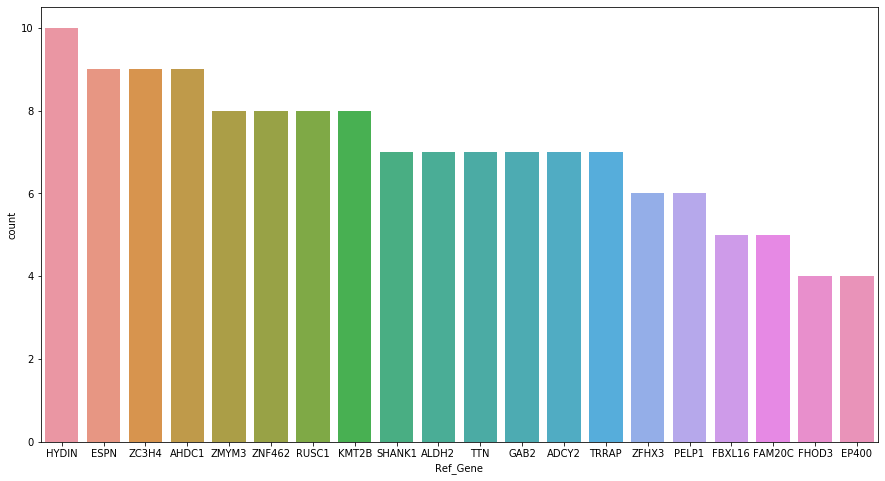

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(case_append.Ref_Gene,
             order = case_append.Ref_Gene.value_counts().index[:20])

##### HYDIN
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=HYDIN
* https://www.malacards.org/card/kartagener_syndrome
* https://www.malacards.org/card/primary_ciliary_dyskinesia This link show details about infertilaty

##### ESPN
* https://ghr.nlm.nih.gov/gene/ESPN#conditions `USHER SYNDROME-- TYPE 1M, Nonsyndromic hearing loss , profound hearing loss, and vestibular areflexia in some patients. [MIM:609006]`
##### AHDC1
* https://ghr.nlm.nih.gov/condition/xia-gibbs-syndrome ` global developmental delay, hypotonia, obstructive sleep apnea, intellectual disability and seizures. `
##### ZC3H4
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5587837/ 
##### ZNF462 
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=ZNF462  `Developmental anomalies during embryogenesis, Rare eye diseases, Rare bone diseases `
##### KMT2B
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=KMT2B `Plays a central role in beta-globin locus transcription regulation by being recruited by NFE2 (PubMed:17707229). Plays an important role in controlling bulk H3K4me during oocyte growth and preimplantation development (By similarity). Required during the transcriptionally active period of oocyte growth for the establishment and/or maintenance of bulk H3K4 trimethylation (H3K4me3), global transcriptional silencing that preceeds resumption of meiosis, oocyte survival and normal zygotic genome activation (By similarity). `
##### ZMYM3
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=ZMYM3  `Diseases associated with ZMYM3 include Dystonia 3, Torsion, X-Linked and Myasthenic Syndrome, Congenital, 6, Presynaptic. An important paralog of this gene is ZMYM2.`  `From UniProt:A chromosomal aberration involving ZMYM3 may be a cause of X-linked mental retardation in Xq13.1. Translocation t(X;13)(q13.1;?).`

##### RUSC1
##### ALDH2
*https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4175174/ `Related to pregnency`
#### TRRAP
`DEVELOPMENTAL DELAY WITH OR WITHOUT DYSMORPHIC FACIES AND AUTISM`
#### TTN
* https://synapse.koreamed.org/Synapse/Data/PDFData/0044KJP/kjp-25-284.pdf
* https://ghr.nlm.nih.gov/gene/TTN 
* https://www.malacards.org/card/spinocerebellar_ataxia_autosomal_recessive_16
##### ADCY2
* 

## Loop for Control

In [5]:
control_merged = pd.DataFrame(columns=rename_col)
control_append = pd.DataFrame(columns=rename_col)

for file in con:
    control = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_control",usecols=col)
    control.columns = rename_col
    control.Clinvar = control.Clinvar.map(lambda x : x[9:])
    control.Intervar = control.Intervar.map(lambda x : x[10:])
    control_append = control_append.append(control)
    control_merged = control_merged.merge(control,how = 'outer', on = rename_col)
control_append.shape, control_merged.shape   

((241, 9), (177, 9))

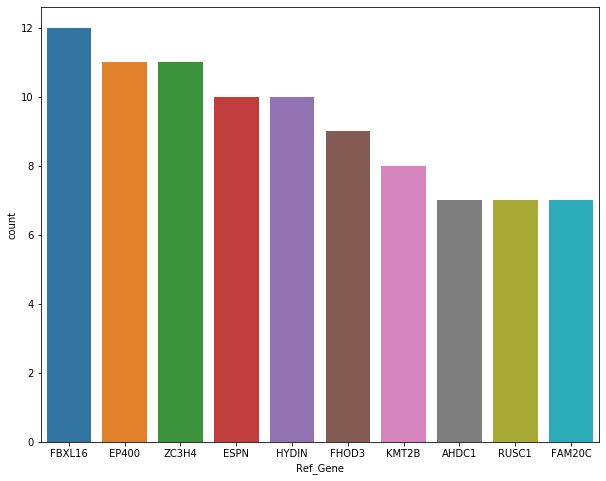

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(control_append.Ref_Gene,
             order = control_append.Ref_Gene.value_counts().index[:10])

In [53]:
#case_append.Ref_Gene.value_counts().index[:20]
case_gene = case_append.Ref_Gene.value_counts()
#display(case_append.Ref_Gene.value_counts()[5:25])
#control_append.Ref_Gene.value_counts().index[:20]
#display(control_append.Ref_Gene.value_counts()[5:25])
control_gene = control_append.Ref_Gene.value_counts()
a=pd.DataFrame([case_gene,control_gene])

In [56]:
pd.set_option('display.max_columns', 1000)
display(a)

,HYDIN,ESPN,ZC3H4,AHDC1,ZMYM3,ZNF462,RUSC1,KMT2B,SHANK1,ALDH2,TTN,GAB2,ADCY2,TRRAP,ZFHX3,PELP1,FBXL16,FAM20C,FHOD3,EP400,JMY,BRD4,HDAC5,PLCB3,RXRB,FANCD2,STIM1,EIF4G1,TNRC18,BAG6,KCNQ2,DNAAF5,EVL,NR3C2,LMF1,MUTYH,KDM6B,WASF3,HADHA,THRA,PKHD1,ARHGEF10L,CNTN2,UBP1,OPN1MW,DYSF,PEX1,SETD1A,ETV6,AP4S1,CERS1,ABCC6,TGM5,MIER3,CCZ1,CACNA1C,LDLR,NCOA6,ERCC5,CLCN2,UPF3B,LAMC3,LSM12,CERS2,CEP152,MYRF,OPN1MW3,COL17A1,ZNF628,ASXL3,TRDN,CD36,LDB3,PHKB,COL4A6,F11,C15orf39,FMNL2,SOD1,GALC,CAPN3,CUBN,XRCC1,FN1,KMT2C,SPIN1,RBFOX3,SENP3,MTMR1,FREM2,LRP5,GJC2,PHGDH,DPYSL2,OPN1MW2,GJB4,HIVEP1,RAC3,CEL,EEF1A2,MACF1,PPP1R13L,AP3D1,SOHLH1,GOLGA8M,MRC1,DAAM2,DCAF15,CHAF1B,USH1C,SLC22A12,CDYL,TMEM43,PLCZ1,CLCN7,LIPH,CHD3,CUX1,TTC37,WHRN,SYTL2,TMEM126A,DAB2IP,CYP21A2,MYCN,TYR,GJA5,EBF3,TBCE,SPTB,FGFR3,TRIOBP,COQ2,MYL3,AUTS2,CRYAA2,SCAPER,SLC12A3,ADAMTSL2,MAFA,MYO7A,FAT3,IKBKG,CRYAA,FMN2,RBM33,SYVN1,HNRNPH1,ACO2,IGSF3,LAMA2,RAC1,FBRS,SLC22A5,SLCO2A1,QDPR,SPEN,GNAT2,PDE1C,CHRNE,ACADSB,FDXR,FBXO7,OLFM2,ATM
Ref_Gene,10.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ref_Gene,10.0,10.0,11.0,7.0,6.0,5.0,7.0,8.0,5.0,2.0,5.0,4.0,4.0,6.0,1.0,5.0,12.0,7.0,9.0,11.0,4.0,5.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
a[a.columns[a.isnull().any()]]

,STIM1,EIF4G1,TNRC18,BAG6,KCNQ2,DNAAF5,LMF1,MUTYH,WASF3,HADHA,THRA,PKHD1,ARHGEF10L,CNTN2,UBP1,OPN1MW,DYSF,SETD1A,ETV6,AP4S1,CERS1,TGM5,MIER3,CCZ1,CACNA1C,LDLR,NCOA6,ERCC5,CLCN2,LAMC3,LSM12,CERS2,CEP152,MYRF,OPN1MW3,COL17A1,ZNF628,ASXL3,TRDN,CD36,LDB3,PHKB,COL4A6,F11,SOD1,GALC,CAPN3,CUBN,XRCC1,FN1,KMT2C,SPIN1,MTMR1,FREM2,LRP5,GJC2,PHGDH,DPYSL2,OPN1MW2,GJB4,HIVEP1,RAC3,CEL,EEF1A2,MACF1,PPP1R13L,AP3D1,SOHLH1,GOLGA8M,MRC1,DAAM2,DCAF15,CHAF1B,USH1C,SLC22A12,CDYL,TMEM43,PLCZ1,CLCN7,LIPH,CHD3,CUX1,TTC37,WHRN,SYTL2,TMEM126A,DAB2IP,CYP21A2,MYCN,TYR,GJA5,EBF3,TBCE,SPTB,FGFR3,TRIOBP,COQ2,MYL3,AUTS2,CRYAA2,SCAPER,SLC12A3,ADAMTSL2,MAFA,MYO7A,FAT3,IKBKG,CRYAA,FMN2,RBM33,SYVN1,HNRNPH1,ACO2,IGSF3,LAMA2,RAC1,FBRS,SLC22A5,SLCO2A1,QDPR,SPEN,GNAT2,PDE1C,CHRNE,ACADSB,FDXR,FBXO7,OLFM2,ATM
Ref_Gene,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ref_Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## We mainly Find 2 Gene Position ALDH2 and ZFHX3 in Case and not in control

In [44]:
our_pos = [139540103,108612304,75534704,75526563,75526563,75526780,75506172,75522394,220876353,90002548,75498490,75531681,\
           96753149,75498490,75531681,96753149,75499347,75517725,96738585,6960776,148550156,75533452,155292758,27878534]
#last 2 digits are sample data from each Case and Control

In [46]:
case_append[case_append.POS.isin(our_pos)]

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar
0,1,155292758,-,C,RUSC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GGGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
3,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
4,1,155292758,-,C,RUSC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."


In [47]:
control_append[control_append.POS.isin(our_pos)]

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar
0,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GCCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,GCCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,GC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."


In [51]:
case_append.shape,control_append.shape

((241, 9), (241, 9))

In [52]:
#case_merged.head()

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar
0,1,155292758,-,C,RUSC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,5,7757684,-,GCCGTGTTCAACATGGTAAGCCCCAGAGCATG,ADCY2,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,6,12012801,T,G,HIVEP1,splicing,.,UNK,"Pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] PM=[0, 1..."
3,6,123702537,T,G,TRDN,splicing,.,UNK,"Pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] PM=[0, 1..."
4,9,109689485,-,G,ZNF462,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."


## Plotting All in a Graph

In [ ]:
case_merged = pd.DataFrame(columns=rename_col)
case_append = pd.DataFrame(columns=rename_col)

for file in cas:
    case = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_case",usecols=col)
    case.columns = rename_col
    case.Clinvar = case.Clinvar.map(lambda x : x[9:])
    case.Intervar = case.Intervar.map(lambda x : x[10:])
    
    case_append = case_append.append(case)
    case_merged = case_merged.merge(case,how = 'outer', on = rename_col)
case_append.shape, case_merged.shape   